In [ ]:
def main():
    predictor = EnhancedBusPredictionSystem()

    datasets = {
        'passflow': {
            'main': '/content/drive/MyDrive/modified_PassFlow (1).csv',
            'stop': '/content/drive/MyDrive/modified_PassFlow2.csv'
        },
        'bus': {
            'main': '/content/drive/MyDrive/bus.csv',
            'stop': '/content/drive/MyDrive/bus_stop.csv'
        }
    }


    all_results = {}

    for dataset_type, paths in datasets.items():
        print(f"\nProcessing {dataset_type} dataset pair...")
        X, y = predictor.preprocess_data(paths['main'], paths['stop'], dataset_type)

        if X is not None and y is not None:
            results = predictor.train_and_evaluate(X, y)
            predictor.print_results(results)
            all_results[dataset_type] = results
        else:
            print(f"Skipping {dataset_type} dataset due to preprocessing errors")

if __name__ == "__main__":
    main()



Processing passflow dataset pair...
Bus DataFrame Sample:
           id  bus_stop_id  bus_id  enter_sum  exit_sum  \
0  1713411380         4994    1607         29        16   
1  1030917530         3880    1671         34        22   
2  1831759213         1312    1665         32        30   
3  1980354222         3963    2729         20        25   
4  1770482183         3880    4734         48        12   

  bus_board_computer_sent_time             created_time  route_number  \
0      2024-12-07T12:18:33.793  2024-12-07T12:23:55.523            50   
1      2024-12-07T15:19:20.206  2024-12-07T15:19:23.203            50   
2      2024-12-07T09:23:26.477  2024-12-07T09:28:44.387            12   
3      2024-12-07T09:13:17.693   2024-12-07T09:21:03.46            50   
4       2024-12-07T15:17:55.33  2024-12-07T15:26:59.704            50   

   tickets_count  
0              2  
1              4  
2             14  
3              3  
4             32  

Bus Stop DataFrame Sample:
   bu


Processing passflow dataset...


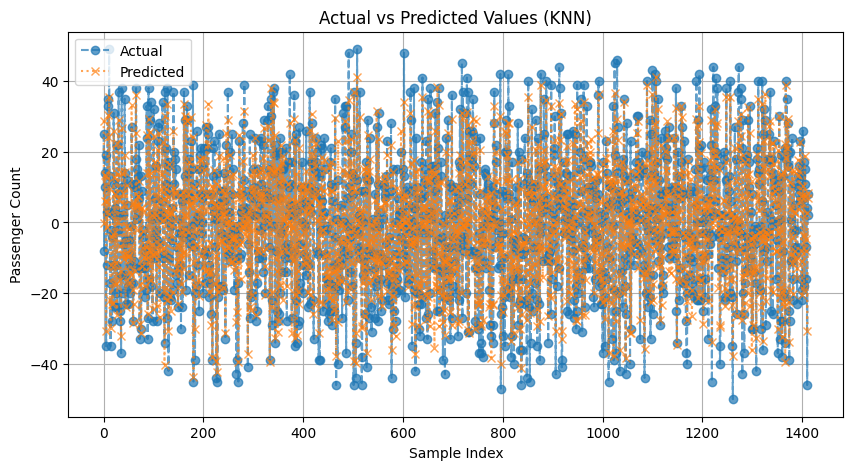

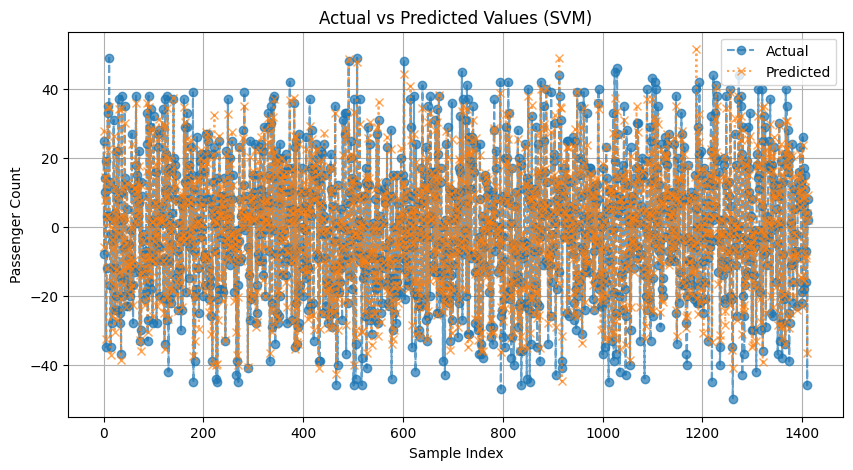

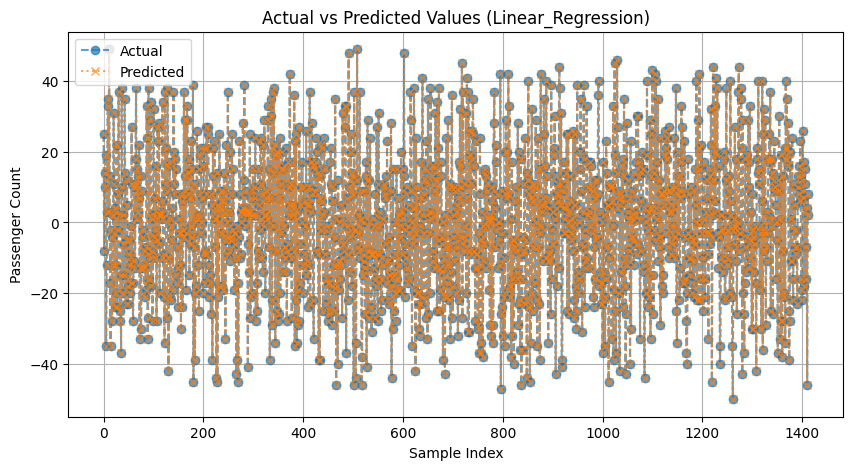

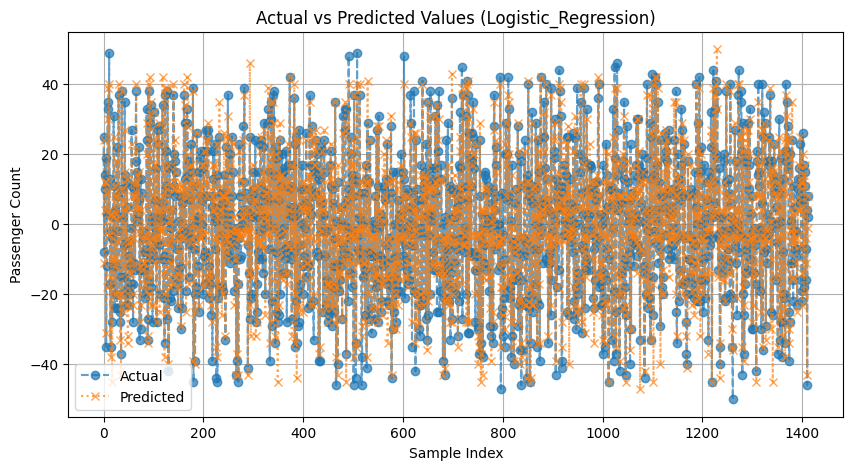

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 382.4470 - mae: 15.6567
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 105.5372 - mae: 8.2919
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 70.2971 - mae: 6.7284
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 56.3113 - mae: 5.9516
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 49.1063 - mae: 5.5776
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 39.3599 - mae: 4.9847
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 38.8127 - mae: 4.9282
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 30.4805 - mae: 4.3366
Epoch 9/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 29.3011 - mae: 4.2924
Epoch 10/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 29.4962 - mae: 4.2449
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


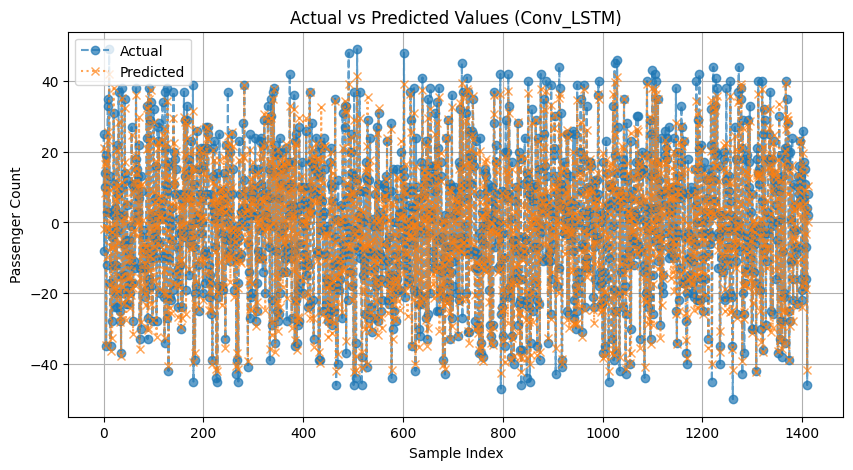


Model Evaluation Results:
--------------------------------------------------------------------------------
Model                       MAE          MSE         RMSE           R2
--------------------------------------------------------------------------------
KNN                        5.47        47.74         6.91         0.88
SVM                        2.39        13.95         3.73         0.97
Linear_Regression          0.00         0.00         0.00         1.00
Logistic_Regression        3.85        25.48         5.05         0.94
Conv_LSTM                  3.54        19.91         4.46         0.95

Processing bus dataset...
Preprocessing Error: 'Latitude or longitude column not found in DataFrame.'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout

class EnhancedBusPredictionSystem:
    def __init__(self):
        self.models = {
            'KNN': KNeighborsRegressor(n_neighbors=5),
            'SVM': SVR(kernel='rbf'),
            'Linear_Regression': LinearRegression(),
            'Logistic_Regression': LogisticRegression(),
            'Conv_LSTM': None
        }
        self.kmeans = KMeans(n_clusters=5, random_state=42)
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='mean')

    def create_conv_lstm_model(self, input_shape):
        model = Sequential([
            Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
            LSTM(50, return_sequences=True),
            LSTM(50),
            Dense(50, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def preprocess_data(self, bus_csv_path, bus_stop_csv_path):
        bus_df = pd.read_csv(bus_csv_path, low_memory=False)
        bus_stop_df = pd.read_csv(bus_stop_csv_path, low_memory=False)

        latitude_col = 'latitude'
        longitude_col = 'longitude'

        try:
            if 'bus_id' in bus_df.columns and 'bus_id' in bus_stop_df.columns:
                df = pd.merge(bus_df, bus_stop_df, on='bus_id', how='inner')
            else:
                for df in [bus_df, bus_stop_df]:
                    if latitude_col in df.columns and longitude_col in df.columns:
                        df['lat_rounded'] = df[latitude_col].round(4)
                        df['lon_rounded'] = df[longitude_col].round(4)
                    else:
                        raise KeyError("Latitude or longitude column not found in DataFrame.")
                df = pd.merge(bus_df, bus_stop_df, on=['lat_rounded', 'lon_rounded'], how='inner')

            enter_sum_cols = [col for col in df.columns if 'enter_sum' in col]
            exit_sum_cols = [col for col in df.columns if 'exit_sum' in col]

            if enter_sum_cols and exit_sum_cols:
                df['enter_sum'] = df[enter_sum_cols[0]]
                df['exit_sum'] = df[exit_sum_cols[0]]
                df['passenger_count'] = df['enter_sum'] - df['exit_sum']

            numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
            if 'latitude' in df.columns and 'longitude' in df.columns:
                cluster_features = df[['latitude', 'longitude']].copy()
                cluster_features = self.imputer.fit_transform(cluster_features)
                df['cluster'] = self.kmeans.fit_predict(cluster_features)
                numeric_features.append('cluster')

            numeric_features = list(set(numeric_features) - {'passenger_count', 'enter_sum', 'exit_sum'})
            X = df[numeric_features].copy()
            y = df['passenger_count'].astype(float) if 'passenger_count' in df.columns else df['enter_sum'].astype(float)

            X = X.dropna(axis=1, how='all')
            X_imputed = self.imputer.fit_transform(X)

            return pd.DataFrame(X_imputed, columns=X.columns), y

        except KeyError as e:
            print(f"Preprocessing Error: {e}")
            return None, None

    def train_and_evaluate(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        results = {}

        for name, model in self.models.items():
            if name == 'Conv_LSTM':
                X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
                X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

                self.models['Conv_LSTM'] = self.create_conv_lstm_model((X_train_reshaped.shape[1], 1))
                self.models['Conv_LSTM'].fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

                y_pred = self.models['Conv_LSTM'].predict(X_test_reshaped).flatten()
                results['Conv_LSTM'] = self.calculate_metrics(y_test, y_pred)
            else:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                results[name] = self.calculate_metrics(y_test, y_pred)

            # Визуализация
            if name == 'KNN':
                self.visualize_knn_predictions(y_test, y_pred)
            elif name == 'SVM':
                self.visualize_svm_predictions(y_test, y_pred)
            elif name in ['Linear_Regression', 'Logistic_Regression']:
                self.visualize_regression_predictions(y_test, y_pred, name)
            elif name == 'Conv_LSTM':
                self.visualize_conv_lstm_predictions(y_test, y_pred)

        return results

    def calculate_metrics(self, y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'R2': r2_score(y_true, y_pred)
        }

    def visualize_predictions(self, y_test, y_pred, model_name):
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', linestyle='dashed', alpha=0.7)
        plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x', linestyle='dotted', alpha=0.7)
        plt.title(f'Actual vs Predicted Values ({model_name})')
        plt.xlabel('Sample Index')
        plt.ylabel('Passenger Count')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_knn_predictions(self, y_test, y_pred):
        self.visualize_predictions(y_test, y_pred, "KNN")

    def visualize_svm_predictions(self, y_test, y_pred):
        self.visualize_predictions(y_test, y_pred, "SVM")

    def visualize_regression_predictions(self, y_test, y_pred, model_name):
        self.visualize_predictions(y_test, y_pred, model_name)

    def visualize_conv_lstm_predictions(self, y_test, y_pred):
        self.visualize_predictions(y_test, y_pred, "Conv_LSTM")

    def print_results(self, results):
        print("\nModel Evaluation Results:")
        print("-" * 80)
        print(f"{'Model':<20} {'MAE':>10} {'MSE':>12} {'RMSE':>12} {'R2':>12}")
        print("-" * 80)
        for model_name, metrics in results.items():
            print(f"{model_name:<20} {metrics['MAE']:>10.2f} {metrics['MSE']:>12.2f} "
                  f"{metrics['RMSE']:>12.2f} {metrics['R2']:>12.2f}")
    plt.show()

def main():
    predictor = EnhancedBusPredictionSystem()

    datasets = {
        'passflow': {'main': '/content/drive/MyDrive/modified_PassFlow (1).csv', 'stop': '/content/drive/MyDrive/modified_PassFlow2.csv'},
        'bus': {'main': '/content/drive/MyDrive/bus.csv', 'stop': '/content/drive/MyDrive/bus_stop.csv'}
    }

    for dataset_type, paths in datasets.items():
        print(f"\nProcessing {dataset_type} dataset...")
        X, y = predictor.preprocess_data(paths['main'], paths['stop'])

        if X is not None and y is not None:
            results = predictor.train_and_evaluate(X, y)
            predictor.print_results(results)

if __name__ == "__main__":
    main()
